# Lab Exercise: Gaussian Mixture Models (GMM) & Apriori Algorithm Using Kaggle Datasets
This lab uses publicly available Kaggle datasets to apply Gaussian Mixture Models for clustering and the Apriori algorithm for association rule mining with Python.

## Part 1: Gaussian Mixture Models (GMM) Clustering
### Dataset: Mall Customers Dataset on Kaggle

This dataset has customer annual income, spending score, and other features perfect for GMM clustering.

In [5]:
# 1.Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Load dataset directly from URL
url = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/Mall_Customers.csv'
df = pd.read_csv(url)

# Display basic info
print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# 2. Select Features for Clustering
# Use 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [7]:
# 3. Preprocess Data with Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


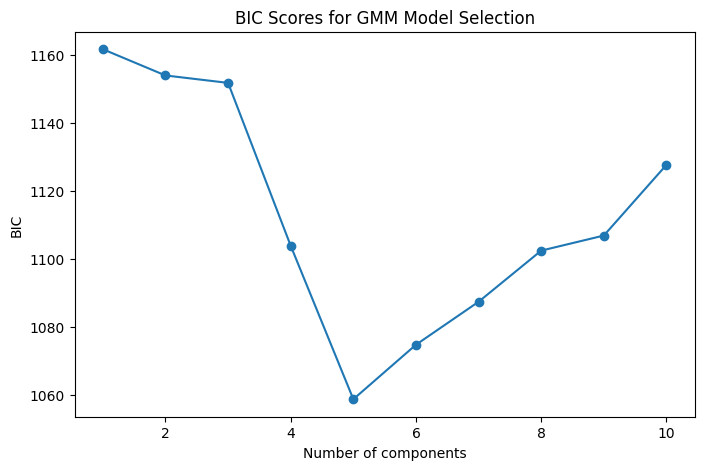

In [8]:
# 4. Find Optimal Number of Gaussian Components Using BIC
n_components = np.arange(1, 11)
bics = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))

plt.figure(figsize=(8,5))
plt.plot(n_components, bics, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('BIC Scores for GMM Model Selection')
plt.show()


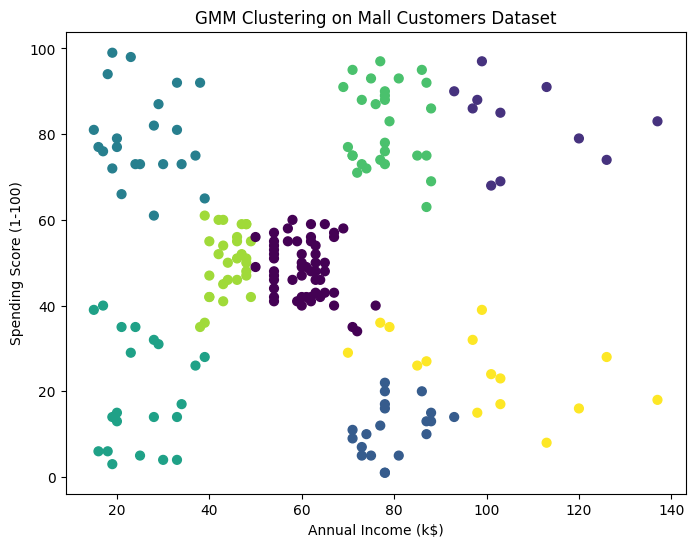

In [9]:
# 5. Fit GMM and Visualize Clusters
# Suppose the lowest BIC is for 5 components
optimal_clusters = 8
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
labels = gmm.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('GMM Clustering on Mall Customers Dataset')
plt.show()


## Part 2: Apriori Algorithm for Association Rule Mining
### Dataset: [Groceries Dataset on Kaggle]

Consists of thousands of retail transactions (market basket format).



In [10]:
# 1. Install and import dependencies
!pip install mlxtend

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
# 2. Load the dataset (adjust path if local)
import kagglehub, os

# Download latest version of the dataset
path = kagglehub.dataset_download("mkechinov/ecommerce-behavior-data-from-multi-category-store")

print("Path to dataset files:", path)

# Example file from the dataset
csv_file = os.path.join(path, "2019-Nov.csv")

# Load dataset
df = pd.read_csv(csv_file)


Path to dataset files: /kaggle/input/ecommerce-behavior-data-from-multi-category-store


In [1]:
# 3. Filter purchase events and prepare transactions

# Filter only 'purchase' events
df_purchase = df[df['event_type'] == 'purchase']

# Select relevant columns and drop NA if any
df_purchase = df_purchase[['user_session', 'product_id']].dropna()

# Group product_ids by user_session to form transactions
transactions = df_purchase.groupby('user_session')['product_id'].apply(list).tolist()


NameError: name 'df' is not defined

In [2]:
# 4. Convert transactions into a one-hot encoded DataFrame

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


NameError: name 'TransactionEncoder' is not defined

In [3]:
# 5. Run the Apriori algorithm to find frequent itemsets

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())


NameError: name 'apriori' is not defined

In [4]:
# 6. Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head())



NameError: name 'association_rules' is not defined

##7. Interpretation and further analysis

- The output rules show which product combinations frequently occur together in purchase sessions.

- Use support, confidence, and lift to assess strength and usefulness of rules.

- Adjust min_support and min_threshold parameters to tune sensitivity.